<p align="center">
  <img src="resources/bigdive.png" alt="BDINTESA"/>
</p>

# TITOLO PROGETTO

## SOTTOTITOLO (opzionale)

- Giacomo Di Prinzio
- Umberto Rubino
- Davide Ritaccio
- Giulia Carletti

## Librerie

In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
import pandas as pd

## Caricamento dati

### Training set

In [46]:
dtypes = {"COD_SAE":str, "DAT_COSTITUZIONE":str}

In [47]:
train_data = pd.read_csv("/home/bigdive/Desktop/BDINTESA/project_work/CONTEST_TRAINING_SET_PUBBLICO.CSV", dtype = dtypes) 

In [48]:
train_data.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013.0,AV,1977.0,243,430,4120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,135220.0,0.0
1,2,84131.0,SA,1984.0,614,492,4719.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844348.0,1054419.0,0.0
2,3,82030.0,BN,1952.0,12,430,11021.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332366.0,0.0
3,4,80133.0,NaN,1982.0,830,430,4120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51762483.0,0.0
4,5,72021.0,BR,1989.0,419,482,10711.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37562.0,34857.0,0.0


### Presenza di valori nulli nel training set

In [49]:
#mask = [~train_data.ix[i].isnull().any() for i in range(len(train_data))]
sum(mask)

51469

In [50]:
print 'Tasso di default (training set completo):\t\t\t', sum(train_data['FLG_DEF_6M'])*1.0/len(train_data)
print 'Tasso di default (training set al netto dei Nan):\t\t', sum(train_data['FLG_DEF_6M'][mask])*1.0/len(train_data[mask])
print 'Tasso di default (sotto campione contenente Nan):\t\t', sum(train_data['FLG_DEF_6M'][np.invert(mask)])*1.0/len(train_data[np.invert(mask)])
print 'Percentuale righe piene:\t\t\t\t\t', sum(mask)*1.0/len(mask)

Tasso di default (training set completo):			0.165571537621
Tasso di default (training set al netto dei Nan):		0.138160834677
Tasso di default (sotto campione contenente Nan):		0.257528353539
Percentuale righe piene:					0.770367155109


Il cambiamento del tasso di default, senza le righe che contengono ALMENO UN Nan, e' basso, il che potrebbe indurre alla scelta di eliminare suddette righe. 
Malgrado cio', analizzando il tasso di default nel sotto campione costrituito aggregando le sole controparti nei cui campi compare almeno un Nan, si osserva un tasso di default sensibilmente diverso: qui superiore al 25%.
Da questo si deduce che la presenza di Nan e' particolarmente concentrata nelle controparti in default e che, dunque, rimuovere suddette controparti dal dataset potrebbe introdurre dei bias e/op rimuovere informazioni utili.

### Test set & solution set

In [51]:
test_data = pd.read_csv("/home/bigdive/Desktop/BDINTESA/project_work/CONTEST_TEST_SET_PUBBLICO.csv", dtype = dtypes)

In [52]:
test_data.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,66812,16033.0,GE,1977.0,830,482,63111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59982.0,59982.0,0.0
1,66813,10090.0,TO,1985.0,345,492,2612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388785.0,391500.0,0.0
2,66814,34170.0,GO,1921.0,648,492,47521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213293.0,211445.0,0.0
3,66815,35044.0,PD,1993.0,467,482,3109.0,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,374537.0,0.0
4,66816,11017.0,AO,1975.0,505,482,4120.0,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,0.0,0.0


In [53]:
sol_data = pd.read_csv("/home/bigdive/Desktop/BDINTESA/project_work/CONTEST_TEST_RESULTS_AN_PRIVATO.csv")

In [54]:
sol_data.head()

,ID,FLG_DEF_6M
0,66812,0
1,66813,0
2,66814,0
3,66815,0
4,66816,0


In [55]:
print "Dimensioni training set:\t" , shape(train_data)
print "Dimensioni test set:\t\t" , shape(test_data)
print "Dimensioni result set:\t\t" , shape(sol_data)

Dimensioni training set:	(66811, 19)
Dimensioni test set:		(7547, 18)
Dimensioni result set:		(7547, 2)


## Preparazione dataset

In [56]:
test_data["FLG_DEF_6M"] = -9999

In [57]:
X =train_data["FLG_DEF_6M"]
train_data.drop(labels="FLG_DEF_6M",axis=1,inplace=True)
train_data["FLG_DEF_6M"]=X

In [58]:
db = pd.concat([train_data, test_data]).reset_index(drop=True)

## Scelta campi da eliminare

I campi SAE, RAE ed ATECO sono ...
- 
- Il codice ATECO, 

In [60]:
sae= db["COD_RAE"].unique()
len(sae)
sae

array([243, 614,  12, 830, 419, 645, 850, 649, 505, 648, 723, 970, 646,
       619, 643, 473, 451,  11, 465, 617, 507, 671, 653, 328, 472, 616,
       642, 652, 660, 467, 423, 984, 245, 772, 654, 414, 641, 431, 313,
       223, 613, 483,   0, 321, 656, 413, 615, 612, 509, 248, 651, 463,
       323, 982, 722, 950, 416, 330, 353, 461, 981, 672,  13, 453, 256,
       314, 761, 311, 920,  14, 247, 644, 432, 436, 424, 491, 343, 455,
       231, 438, 630, 495, 647, 493, 345, 246, 316, 342, 620, 312, 611,
       322, 324, 721, 372, 255, 464, 840, 506, 771, 411, 371, 482, 224,
       242, 417, 352, 655, 474, 252, 618, 412, 373, 325, 253, 960, 341,
       741, 983, 456, 790, 442, 439,  20, 494, 421, 326, 258, 428, 940,
        30, 481, 221, 374, 492, 344, 361, 742, 222, 441, 930, 162, 763,
       347, 170, 363, 773, 351, 346, 161, 415, 327, 471, 466, 462, 425,
       241, 422, 315, 257, 212, 140, 762, 429, 364,  19, 259, 244, 111,
       725, 211, 239, 163, 750, 233, 710, 764, 362, 130, 260, 42

In [61]:
sae= db["COD_SAE"].unique()
len(sae)
sae

array(['430', '492', '482', '490', '615', '614', '491', '500', '501',
       '480', '280', '432', '476', '284', '481', '268', '177', '175',
       '759', '551', '450', '288', '259', '178', '263', '273', '258',
       '285', '477'], dtype=object)

In [62]:
sae= db["COD_SAE"].unique()
len(sae)
sae

array(['430', '492', '482', '490', '615', '614', '491', '500', '501',
       '480', '280', '432', '476', '284', '481', '268', '177', '175',
       '759', '551', '450', '288', '259', '178', '263', '273', '258',
       '285', '477'], dtype=object)

### droppiamo via features 

In [63]:
db.drop(labels="COD_PROVINCIA",axis=1,inplace=True) #eliminiamo cod_provincia

In [64]:
db.drop(labels="COD_RAE",axis=1,inplace=True) #eliminiamo cod_rae

In [65]:
db.drop(labels="COD_ISTAT_ATECO_07",axis=1,inplace=True) #eliminiamo cod. ateco

## sistemazione Nan

In [66]:
#db.isnull().sum().sum()

In [67]:
#temp = db

In [68]:
#db = temp

In [69]:
db = db.fillna(0) #sostituisco gli NA con 0

In [70]:
#db.head()

In [71]:
## STUDIO CORRELAZIONI

db_stat=db.where(db.FLG_DEF_6M >= 0)

corr=db_stat.corr(method="spearman", min_periods=1)
corr = abs(corr)
corr_80 = corr.where(corr >= 0.8)
corr_80

,ID,COD_CAP,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,FLG_DEF_6M
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COD_CAP,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBI201312_CREDITI,NaN,NaN,1.000000,NaN,NaN,NaN,0.817863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBI201312_UTILE_PERDITA_ESERCIZIO,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBI201312_PATRIMONIO_NETTO,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBI201312_DEBITI_CONSOLIDATI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBI201312_DEBITI_ENTRO_ES_SUCC,NaN,NaN,0.817863,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBI201312_RICAVI_NETTI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.8497,0.839136,NaN,NaN,NaN,NaN
CBI201312_ACQUISTI_NETTI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849700,1.0000,NaN,NaN,NaN,NaN,NaN
CBI201312_COSTI_SERVZ_BENI_TERZI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.839136,NaN,1.000000,NaN,NaN,NaN,NaN


### aggregato cap regione

In [72]:
def cap2reg(cap):
    cap = int(cap)
    if (64010 <= cap) & (cap <= 67100):
        return "Abruzzo"
    elif (75010 <= cap) & (cap <= 85100):
        return "Basilicata"
    elif (87010 <= cap) & (cap <= 89900):
        return "Calabria"
    elif (80010 <= cap) & (cap <= 84135):
        return "Campania"
    elif (29010 <= cap) & (cap <= 48125):
        return "Emilia Romagna"
    elif (33010 <= cap) & (cap <= 34170):
        return "Friuli Venezia Giulia"
    elif (10 <= cap) & (cap <= 4100):
        return "Lazio"
    elif (12071 <= cap) & (cap <= 19137):
        return "Liguria"
    elif (20010 <= cap) & (cap <= 46100):
        return "Lombardia"
    elif (60010 <= cap) & (cap <= 63900):
        return "Marche"
    elif (86010 <= cap) & (cap <= 86170):
        return "Molise"
    elif (10010 <= cap) & (cap <= 28925):
        return "Piemonte"
    elif (70010 <= cap) & (cap <= 76125):
        return "Puglia"
    elif (7010 <= cap) & (cap <= 9170):
        return "Sardegna"
    elif (90010 <= cap) & (cap <= 98168):
        return "Sicilia"
    elif (50012 <= cap) & (cap <= 59100):
        return "Toscana"
    elif (38010 <= cap) & (cap <= 39100):
        return "Trentino Alto Adige"
    elif (5010 <= cap) & (cap <= 6135):
        return "Umbria"
    elif (11010 <= cap) & (cap <= 11100):
        return "Valle D'Aosta"
    elif (30010 <= cap) & (cap <= 45100):
        return "Veneto"
    else:
        return None

In [73]:
db["REGIONE"] = db["COD_CAP"].map(cap2reg, na_action='ignore')
#db.head()

In [74]:
db.drop(labels="COD_CAP", axis=1, inplace=True)

## Creazione csv per data viz

In [75]:
db_n=db[db.FLG_DEF_6M >= 0]
db_n.shape

(66811, 16)

In [76]:
temp = db_n['FLG_DEF_6M']
db_n.drop(labels=['FLG_DEF_6M'],axis=1,inplace = True)
db_n.insert(1,'FLG_DEF_6M',temp)
del temp

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [77]:
temp = db_n['REGIONE']
db_n.drop(labels=['REGIONE'],axis=1,inplace = True)
db_n.insert(2,'REGIONE',temp)
del temp

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [78]:
temp = db_n['COD_SAE']
db_n.drop(labels=['COD_SAE'],axis=1,inplace = True)
db_n.insert(3,'COD_SAE',temp)
del temp

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [79]:
db_n.columns[0],db_n.columns[1],db_n.columns[2],db_n.columns[3]

('ID', 'FLG_DEF_6M', 'REGIONE', 'COD_SAE')

In [80]:
db_n = db_n[db_n.columns[0:4]]
db_n.head()

,ID,FLG_DEF_6M,REGIONE,COD_SAE
0,1,1,Basilicata,430
1,2,1,Basilicata,492
2,3,1,Basilicata,430
3,4,1,Basilicata,430
4,5,0,Puglia,482


In [81]:
db_n.to_csv('db.csv')

## Fine creazione csv per data viz

## creazione dummies

In [82]:
features = ["DAT_COSTITUZIONE", "COD_SAE", "REGIONE"]

In [83]:
%%time
db=pd.concat([db, pd.get_dummies(db[features], columns=features)], axis=1)
db.drop(features, axis=1, inplace=True)

CPU times: user 720 ms, sys: 1.11 s, total: 1.83 s
Wall time: 1.91 s


In [84]:
%%time 
db["FLAG_GARANZIA"]=0
for el in db.IMP_VALORE_GARANZIA:
    if el>0.0:
        db["FLAG_GARANZIA"]=1

CPU times: user 5.22 s, sys: 16 ms, total: 5.24 s
Wall time: 5.57 s


## nuove features

In [85]:
db["IMP_UTILIZZATO/IMP_ACCORDATO"] = db.IMP_UTILIZZATO.div(db.IMP_ACCORDATO)
#db["IMP_UTILIZZATO/IMP_ACCORDATO"] = db.IMP_UTILIZZATO.div(db.IMP_ACCORDATO).replace(inf, 0)

In [86]:
db["IMP_UTILIZZATO/IMP_ACCORDATO"].isnull().sum()*1.0/db.shape[0]

0.0015196750853976708

In [87]:
(db["IMP_UTILIZZATO/IMP_ACCORDATO"] == inf).sum()*1.0/len(db["IMP_UTILIZZATO/IMP_ACCORDATO"])

0.040802603620323299

In [88]:
(db["IMP_UTILIZZATO/IMP_ACCORDATO"] == -inf).sum()*1.0/len(db["IMP_UTILIZZATO/IMP_ACCORDATO"])

0.0

In [89]:
# decidiamo di mettere uno per quanto sopra

In [90]:
db["IMP_UTILIZZATO/IMP_ACCORDATO"] = db.IMP_UTILIZZATO.div(db.IMP_ACCORDATO).replace(inf, 1).replace(nan,0)

In [91]:
#andiamo avanti

In [92]:
db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"] = db.CBI201312_DEBITI_CONSOLIDATI.div(db.CBI201312_CREDITI)

In [93]:
(db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"] == inf).sum()*1.0/len(db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"])

0.0088356330186395542

In [94]:
db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"].isnull().sum()*1.0/db.shape[0]

0.16369455875628716

In [95]:
db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"] = db.CBI201312_DEBITI_CONSOLIDATI.div(db.CBI201312_CREDITI).replace(inf, 1).replace(nan,0)

In [96]:
#avanti

In [97]:
db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"] = db.CBI201312_DEBITI_ENTRO_ES_SUCC.div(db.CBI201312_CREDITI)

In [98]:
(db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"] == inf).sum()*1.0/len(db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"])

0.011269802845692461

In [99]:
db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"].isnull().sum()*1.0/db.shape[0]

0.16126038892923425

In [100]:
db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"] = db.CBI201312_DEBITI_ENTRO_ES_SUCC.div(db.CBI201312_CREDITI).replace(inf,1).replace(nan, 0)

In [101]:
#db.isnull().sum().sum()

## Spostiamo la variabile target all'inizio

In [102]:
temp = db['FLG_DEF_6M']
db.drop(labels=['FLG_DEF_6M'],axis=1,inplace = True)
db.insert(1,'FLG_DEF_6M',temp)
del temp

In [103]:
db.head()

,ID,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.248797,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
3,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0.927986,0.0,0.0


In [104]:
#db.to_csv('db.csv')

## Modello

In [105]:
train = db[db.FLG_DEF_6M >= 0]
train.shape

(66811, 194)

In [106]:
test = db[db.FLG_DEF_6M < 0]
test.shape

(7547, 194)

In [107]:
test.drop(labels="FLG_DEF_6M",axis=1,inplace=True) 
test.shape

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(7547, 193)

In [108]:
test.head()

,ID,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
66811,66812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59982.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.000000,0.000000
66812,66813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388785.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1.006983,0.000000,0.000000
66813,66814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.991336,0.000000,0.000000
66814,66815,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.856588,1.416000,2.808000
66815,66816,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,8.764706,0.509804


In [109]:
test.drop(labels="ID",axis=1,inplace=True) 

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [110]:
X = train[train.columns[2:]] #tolgo id e defaults
shape(X)

(66811, 192)

In [111]:
X.head()

,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844348.0,1054419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.248797,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332366.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51762483.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37562.0,34857.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0.927986,0.0,0.0


In [112]:
y = train["FLG_DEF_6M"]
#y

In [113]:
#from sklearn.cross_validation import train_test_split

In [114]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

In [115]:
%%time
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators=100, random_state=15)
model.fit(X, y)

#plot_decision_boundary(model, X_train)

# plot the dataset points
#scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=50)

KeyboardInterrupt: 

In [118]:
from sklearn import metrics

In [119]:
type(ravel(sol_data))

numpy.ndarray

In [120]:
shape(test)

(7547, 192)

In [121]:
shape(X)

(66811, 192)

In [122]:
y_true = ravel(sol_data["FLG_DEF_6M"])

shape(sol_data)



(7547, 2)

AUC: 0.897394756168


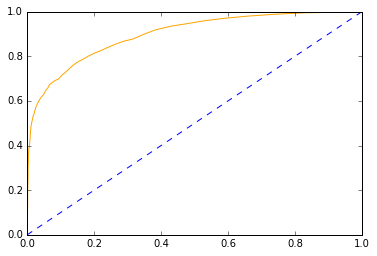

In [123]:
y_pred = model.predict_proba(test)
fpr, tpr, _ = metrics.roc_curve(ravel(sol_data["FLG_DEF_6M"]) , y_pred[:,1])
print "AUC:", metrics.auc(fpr, tpr)
plot ([0,1] , [0,1],"--",fpr,tpr,"orange")
show()

In [128]:
y_pred_1_e_0 = model.predict(test)

In [153]:
y_pred_1_e_0

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
pd.options.display.max_rows = 500

In [130]:
pd.DataFrame([y_pred[:,1],y_pred_1_e_0]).T

,0,1
0,0.14,0.0
1,0.20,0.0
2,0.32,0.0
3,0.07,0.0
4,0.05,0.0
5,0.08,0.0
6,0.24,0.0
7,0.01,0.0
8,0.02,0.0
9,0.01,0.0


In [131]:
# AUC: 0.871034764006 (con -999999)
# AUC: 0.873450448055 (con 0)
# AUC: 0.873392986888 (con medie)
# AUC: 0.872525509275(con mediane)

In [132]:
#scegliamo lo 0!

In [133]:
db.head()

,ID,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.248797,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
3,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0.927986,0.0,0.0


# Confusion Matrix

In [126]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_1_e_0)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_1_e_0)

array([[6166,   70],
       [ 674,  637]])

In [ ]:
652+659

In [ ]:
#db[db.FLAG_GARANZIA != 0].head()

In [ ]:
sol_data['FLG_DEF_6M'].sum()

## Bilancio dataset

In [ ]:
#pescare random un numeri di bonis pari al numero di default
#non faremo cross validation


In [163]:
#usiamo class_weight 

from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators=100,  random_state=15, class_weight= {0:1,1:10})
model.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

AUC: 0.894240474712


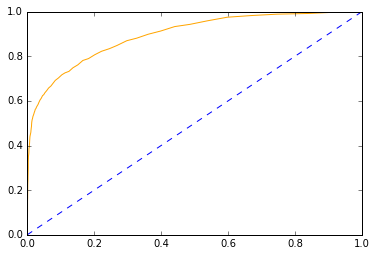

In [164]:

#y_pred = model.predict_proba(test)
fpr, tpr, _ = metrics.roc_curve(ravel(sol_data["FLG_DEF_6M"]) , y_pred[:,1])
print "AUC:", metrics.auc(fpr, tpr)
plot ([0,1] , [0,1],"--",fpr,tpr,"orange")
show()

In [165]:
y_pred_1_e_0_bil = model.predict(test)

In [155]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_1_e_0_bil)

array([[6161,   75],
       [ 677,  634]])

(array([ 4116.,  1598.,   702.,   246.,   167.,   136.,   114.,   127.,
          135.,   206.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

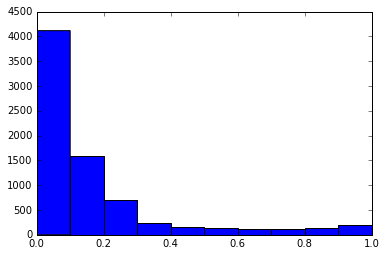

In [167]:
hist(y_pred[:,1])

## creazione variabili

In [475]:
features_to_combine = db[db.columns[1:11]].columns
features_to_combine

Index([u'CBI201312_CREDITI', u'CBI201312_UTILE_PERDITA_ESERCIZIO',
       u'CBI201312_PATRIMONIO_NETTO', u'CBI201312_DEBITI_CONSOLIDATI',
       u'CBI201312_DEBITI_ENTRO_ES_SUCC', u'CBI201312_RICAVI_NETTI',
       u'CBI201312_ACQUISTI_NETTI', u'CBI201312_COSTI_SERVZ_BENI_TERZI',
       u'IMP_ACCORDATO', u'IMP_UTILIZZATO'],
      dtype='object')

In [476]:
%time
for col1 in features_to_combine:
    for col2 in features_to_combine:
        try:
            if col1!=col2:
                db[col1+'/'+col2]= db[col1].div(db[col2])
            if col2+'*'+col1 not in db.columns:
                db[col1+'*'+col2]= db[col1].mul(db[col2])
        except:
            print ('Something went wrong!')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


In [477]:
db.head()

,ID,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,...,IMP_UTILIZZATO/CBI201312_CREDITI,IMP_UTILIZZATO/CBI201312_UTILE_PERDITA_ESERCIZIO,IMP_UTILIZZATO/CBI201312_PATRIMONIO_NETTO,IMP_UTILIZZATO/CBI201312_DEBITI_CONSOLIDATI,IMP_UTILIZZATO/CBI201312_DEBITI_ENTRO_ES_SUCC,IMP_UTILIZZATO/CBI201312_RICAVI_NETTI,IMP_UTILIZZATO/CBI201312_ACQUISTI_NETTI,IMP_UTILIZZATO/CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_UTILIZZATO/IMP_ACCORDATO,IMP_UTILIZZATO*IMP_UTILIZZATO
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.828445e+10
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844348.0,...,inf,inf,inf,inf,inf,inf,inf,inf,1.248797,1.111799e+12
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.104672e+11
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,2.679355e+15
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37562.0,...,inf,inf,inf,inf,inf,inf,inf,inf,0.927986,1.215010e+09


In [478]:
db.isnull().sum()/db.shape[0]

ID                                                                   0.000000
CBI201312_CREDITI                                                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO                                    0.000000
CBI201312_PATRIMONIO_NETTO                                           0.000000
CBI201312_DEBITI_CONSOLIDATI                                         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC                                       0.000000
CBI201312_RICAVI_NETTI                                               0.000000
CBI201312_ACQUISTI_NETTI                                             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI                                     0.000000
IMP_ACCORDATO                                                        0.000000
IMP_UTILIZZATO                                                       0.000000
IMP_VALORE_GARANZIA                                                  0.000000
FLG_DEF_6M                                                      

In [484]:
(db == inf).sum()/db.shape[0]

ID                                                                   0.000000
CBI201312_CREDITI                                                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO                                    0.000000
CBI201312_PATRIMONIO_NETTO                                           0.000000
CBI201312_DEBITI_CONSOLIDATI                                         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC                                       0.000000
CBI201312_RICAVI_NETTI                                               0.000000
CBI201312_ACQUISTI_NETTI                                             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI                                     0.000000
IMP_ACCORDATO                                                        0.000000
IMP_UTILIZZATO                                                       0.000000
IMP_VALORE_GARANZIA                                                  0.000000
FLG_DEF_6M                                                      

In [485]:
(db == -inf).sum()/db.shape[0]

ID                                                                   0.0
CBI201312_CREDITI                                                    0.0
CBI201312_UTILE_PERDITA_ESERCIZIO                                    0.0
CBI201312_PATRIMONIO_NETTO                                           0.0
CBI201312_DEBITI_CONSOLIDATI                                         0.0
CBI201312_DEBITI_ENTRO_ES_SUCC                                       0.0
CBI201312_RICAVI_NETTI                                               0.0
CBI201312_ACQUISTI_NETTI                                             0.0
CBI201312_COSTI_SERVZ_BENI_TERZI                                     0.0
IMP_ACCORDATO                                                        0.0
IMP_UTILIZZATO                                                       0.0
IMP_VALORE_GARANZIA                                                  0.0
FLG_DEF_6M                                                           0.0
DAT_COSTITUZIONE_0                                 

In [487]:
(db == -inf).sum().sum()

13324

In [488]:
db['IMP_ACCORDATO/IMP_UTILIZZATO'].isnull().sum()

113

In [489]:
(db['IMP_ACCORDATO/IMP_UTILIZZATO']==inf).sum()

2654

## classificazione